# OM Oxidation with Carbon Release from Soil
Assumptions:
Carbon Speciated using FTICR-MS Data from Large Size Fraction, t=0 sample 
Carbon Size = Bulk (i.e., Large Size Fraction Values)
Microbial Reaction = Lambda

# Import Libraries

In [1]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ipywidgets import Layout, Box, Label, RadioButtons, Tab, HBox, VBox, Accordion, Select, interactive, Dropdown, interact
import subprocess
import sys
import os

# Simulation Files 

In [2]:
# PFLOTRAN INPUT DECK FILE NAME
PF_input_filename = "OM_oxidation_speciated_WC_EXT_OX_t1_L"

# EXPERIMENTAL DATA FILE
df = pd.read_excel("OWC_WC_OXNIC.xlsx")

# PFLOTRAN OUTPUT FILENAME FOR PLOTTING
filename = './OM_oxidation_speciated_WC_EXT_OX_t1_L-obs-0.pft'

# Run PFLOTRAN & write output files

In [3]:
fout = open("OM_oxidation_speciated_WC_EXT_OX_t1_L.stdout","w")
subprocess.run(["pflotran","-input_prefix",PF_input_filename],stdout=fout, stderr=fout)
fout.close()

# Plot Results Against Experimental Data

In [4]:
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')

import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

import sys
import os
try:
  pflotran_dir = os.environ['PFLOTRAN_DIR']
except KeyError:
  print('PFLOTRAN_DIR must point to PFLOTRAN installation directory and be defined in system environment variables.')
  sys.exit(1)
sys.path.append(pflotran_dir + '/src/python')

#import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import pflotran as pft

path = []
path.append('.')

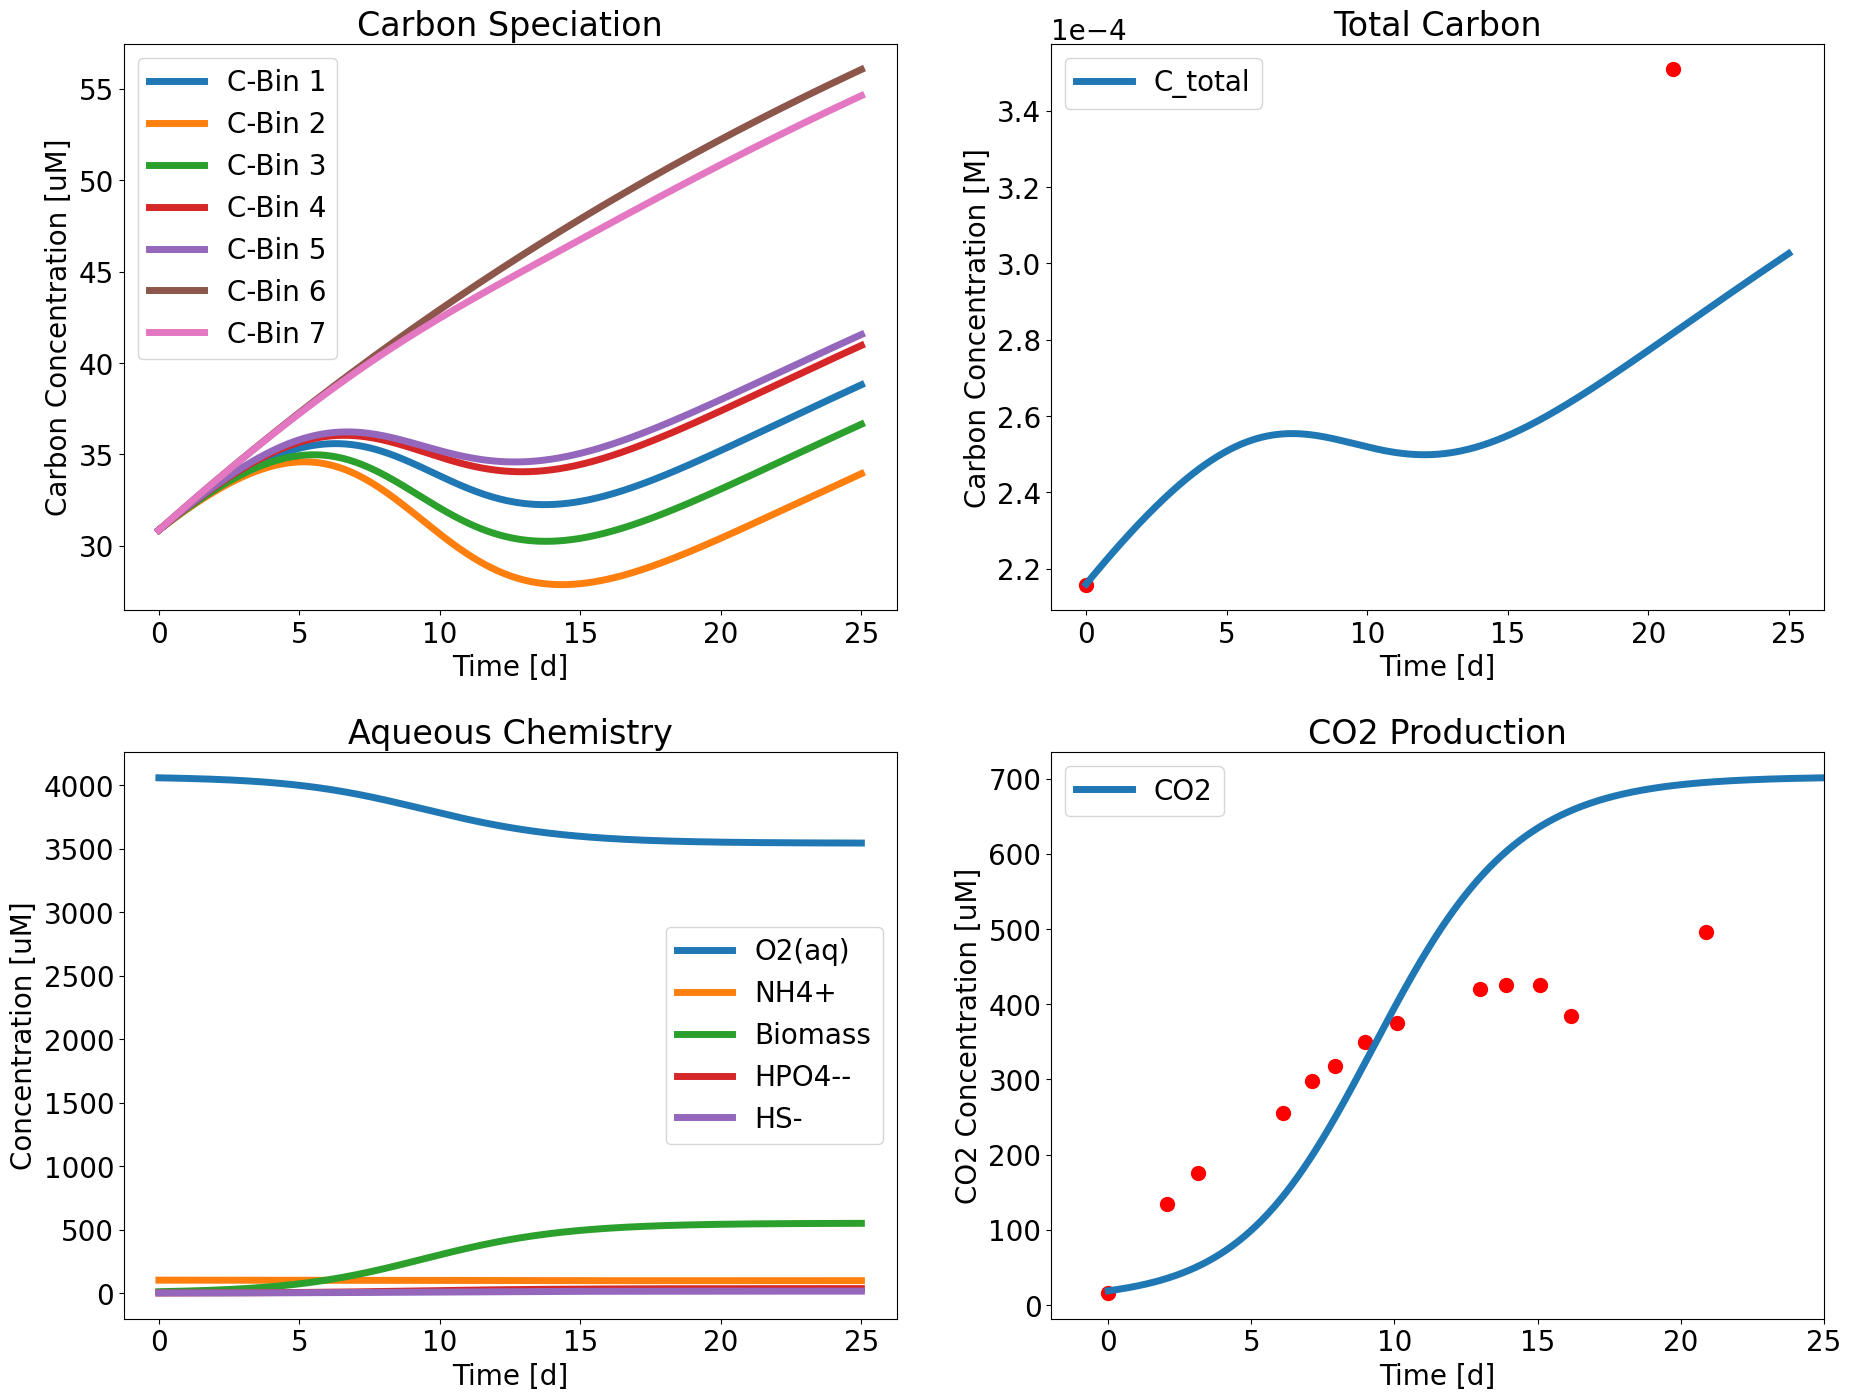

In [7]:
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize = (20,15))
plt.rcParams.update({'font.size': 20})
plt.rc('axes', labelsize = 20)

############### SOLID Carbon Plots ###############
# icol = []
# icol.append(3)

# for i in range(len(icol)):
#     data = pft.Dataset(filename,1,icol[i])
#     ax[0][0].plot(data.get_array('x'),data.get_array('y'), label = 'Solid Carbon', linewidth=3)
    
# ax[0][0].set_title('Solid Phase Carbon')
# ax[0][0].set_ylabel('Solid Carbon Concentration [uM]')
# ax[0][0].set_xlabel('Time [d]')
# ax[0][0].ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
# ax[0][0].legend(loc =1)


############ Carbon Speciation Plots ##########
icol = []
icol.append(11)
icol.append(12)
icol.append(13)
icol.append(14)
icol.append(15)
icol.append(16)
icol.append(17)

label = ['C-Bin 1','C-Bin 2','C-Bin 3','C-Bin 4','C-Bin 5','C-Bin 6','C-Bin 7',]
C_tot = []
C_sum = 0
C_sum2 = []

for i in range(len(icol)):
    data = pft.Dataset(filename,1,icol[i])
  #ax[0][0].plot(data.get_array('x'),data.get_array('y')*1000000,label=data.get_name('yname'), linewidth=5)
    ax[0][0].plot(data.get_array('x'),data.get_array('y')*1000000,label=label[i], linewidth=5)
#  plt.plot(data.get_array('x'),data.get_array('y'),label=Label[i])
    C_tot.append(data.get_array('y'))

ax[0][0].set_title('Carbon Speciation')
ax[0][0].set_ylabel('Carbon Concentration [uM]')
ax[0][0].set_xlabel('Time [d]')
#ax[0][0].ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
ax[0][0].legend(loc = 0)

#### Total Carbon Plot ######
#####Calculating Total Carbon at each Timestep. Stored in C_sum2
for time in range(len(data.get_array('x'))):
   C_sum = 0 
   for i in range(len(icol)):
       C_sum = C_sum + C_tot[i][time]
   C_sum2.append(C_sum)

#C_sum2= C_sum2*1000000
ax[0][1].plot(data.get_array('x'),C_sum2[:],label='C_total', linewidth=5)
ax[0][1].scatter(df['Time-TOC [d]'], df['Total TOC [umol/L]-Large']/1000000, marker = 'o', c= 'r' , s= 100)
ax[0][1].set_title('Total Carbon')
ax[0][1].set_ylabel('Carbon Concentration [M]')
ax[0][1].set_xlabel('Time [d]')
ax[0][1].ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
ax[0][1].legend(loc = 0)

################## AQ CHEM Plot ####################
icol = []

icol.append(9)
icol.append(5)
icol.append(10)
icol.append(6)
icol.append(7)

label = [ 'O2(aq)', 'NH4+','Biomass', 'HPO4--','HS-']

for i in range(len(icol)):
    data = pft.Dataset(filename,1,icol[i])
  #plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=data.get_name('yname'), linewidth=3)
    ax[1][0].plot(data.get_array('x'),data.get_array('y')*1000000,label='{}'.format(label[i]), linewidth=5)
    #ax[1][0].plot(data.get_array('x'),data.get_array('y')*1000000,label=data.get_name('yname'), linewidth=5)

ax[1][0].set_title('Aqueous Chemistry')
ax[1][0].set_ylabel('Concentration [uM]')
ax[1][0].set_xlabel('Time [d]')
#ax[1][0].ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
ax[1][0].legend(loc =0)

################## Total CO2 produced Plot ####################
plt.xlim(-2.,25)
#plt.ylim(-10.,550)

icol = []
icol.append(18)

for i in range(len(icol)):
    data = pft.Dataset(filename,1,icol[i])
  #plt.plot(data.get_array('x'),data.get_array('y')*1000000,label=data.get_name('yname'), linewidth=3)
    ax[1][1].plot(data.get_array('x'),data.get_array('y')*1000000,label='CO2', linewidth=5)

ax[1][1].scatter(df[df.columns[0]], df[df.columns[1]], marker = 'o', c= 'r' , s= 100)
ax[1][1].set_title('CO2 Production')
ax[1][1].set_ylabel('CO2 Concentration [uM]')
ax[1][1].set_xlabel('Time [d]')
#ax[1][1].ticklabel_format(style = 'sci', axis = 'y', scilimits = (0,0))
ax[1][1].legend(loc = 0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.95, 
                    top=0.95, 
                    wspace=0.2, 
                    hspace=0.25)

plt.show()